In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/tweets_wmost_important_word.csv")

In [3]:
df.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities,most_important_word
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...,question
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...,paying
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN,showed
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...,theres
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN,answer


In [4]:
len(set(df["most_important_word"]))

1055

In [5]:
grouped = df.groupby("most_important_word").count().sort_values("id", ascending=False)
grouped.shape

(1054, 28)

In [6]:
for i in range(1, 11):
    temp_grouped = grouped[grouped["id"] > i]
    print(i, temp_grouped.shape[0])
    print(f'We retain {round(temp_grouped.shape[0]/grouped.shape[0] * 100, 2)}% of distinct most important words.')

1 1002
We retain 95.07% of distinct most important words.
2 919
We retain 87.19% of distinct most important words.
3 815
We retain 77.32% of distinct most important words.
4 707
We retain 67.08% of distinct most important words.
5 579
We retain 54.93% of distinct most important words.
6 459
We retain 43.55% of distinct most important words.
7 334
We retain 31.69% of distinct most important words.
8 222
We retain 21.06% of distinct most important words.
9 113
We retain 10.72% of distinct most important words.
10 46
We retain 4.36% of distinct most important words.


In [7]:
grouped.reset_index(inplace=True)

In [34]:
df["lang"].replace("und", "en", inplace=True)
df["lang"].replace("da", "en", inplace=True)
df["lang"].replace("et", "en", inplace=True)
df["lang"].replace("fi", "en", inplace=True)
df["lang"].replace("fr", "en", inplace=True)
df["lang"].replace("tl", "en", inplace=True)

In [35]:
occurrence_map = {}

for i in range(len(df)):
    miw = df.iloc[i].most_important_word
    lang = df.iloc[i].lang
    
    if (miw, lang) not in occurrence_map:
        occurrence_map[(miw, lang)] = 1
    else:
        occurrence_map[(miw, lang)] += 1
        
occurrence_map

{('question', 'en'): 8,
 ('paying', 'en'): 10,
 ('showed', 'en'): 6,
 ('theres', 'en'): 7,
 ('answer', 'en'): 4,
 ('3pm', 'en'): 8,
 ('registered', 'en'): 12,
 ('goes', 'en'): 9,
 ('movement', 'en'): 7,
 ('single', 'en'): 6,
 ('weeks', 'en'): 4,
 ('foundation', 'en'): 8,
 ('polls', 'en'): 5,
 ('lied', 'en'): 7,
 ('afternoon', 'en'): 9,
 ('raised', 'en'): 5,
 ('months', 'en'): 5,
 ('celebrate', 'en'): 8,
 ('country', 'en'): 2,
 ('want', 'en'): 8,
 ('hear', 'en'): 2,
 ('prepared', 'en'): 9,
 ('homes', 'en'): 5,
 ('child', 'en'): 6,
 ('really', 'en'): 6,
 ('living', 'en'): 7,
 ('nbc', 'en'): 10,
 ('biggest', 'en'): 7,
 ('nights', 'en'): 6,
 ('debates2016', 'en'): 9,
 ('endorsement', 'en'): 3,
 ('winner', 'en'): 9,
 ('sobre', 'es'): 9,
 ('register', 'en'): 10,
 ('young', 'en'): 6,
 ('problem', 'en'): 5,
 ('wins', 'en'): 9,
 ('heard', 'en'): 5,
 ('built', 'en'): 10,
 ('global', 'en'): 10,
 ('wsj', 'en'): 4,
 ('problems', 'en'): 6,
 ('maga', 'en'): 3,
 ('getting', 'en'): 2,
 ('miss', 'en'): 

In [9]:
from nltk.tokenize import TweetTokenizer

In [36]:
tknzr = TweetTokenizer()
tweets = df['text']
tweet_length = []

for text in tweets:
    temp = tknzr.tokenize(text)
    tweet_length.append(len(temp))
    
df["tweet_length"] = tweet_length

In [37]:
df["miw_occurrence"] = df.set_index(['most_important_word', 'lang']).index.map(occurrence_map)

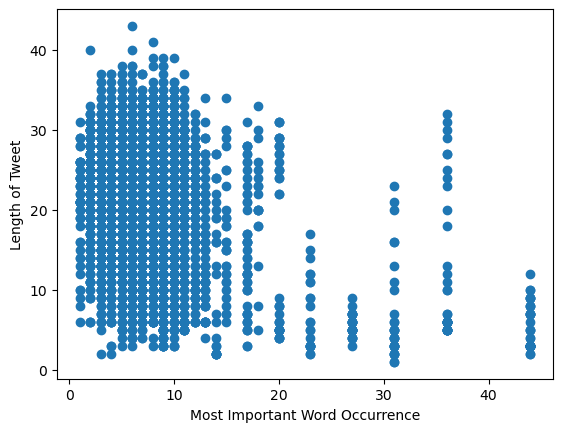

In [13]:
plt.scatter(df["miw_occurrence"], df["tweet_length"])
plt.xlabel("Most Important Word Occurrence")
plt.ylabel("Length of Tweet")
plt.show()

In [38]:
# df.to_csv("data/tweets_word_count.csv", index=False)